In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
### Load Dataset
df = pd.read_csv("shopping_trends_dataset.csv")

In [11]:
print(df.columns)

Index(['CustomerID', 'Age', 'Gender', 'ItemPurchased', 'Category',
       'PurchaseAmountUSD', 'Location', 'Size', 'Color', 'Season',
       'ReviewRating', 'SubscriptionStatus', 'ShippingType', 'DiscountApplied',
       'PromoCodeUsed', 'PreviousPurchases', 'PaymentMethod',
       'FrequencyOfPurchases'],
      dtype='object')


In [12]:
# Map frequency to numeric
frequency_map = {'Weekly': 4, 'Fortnightly': 2, 'Monthly': 1}
df['FrequencyOfPurchases'] = df['FrequencyOfPurchases'].map(frequency_map)

In [13]:
# Check mapping
print(df[['FrequencyOfPurchases']].head())

   FrequencyOfPurchases
0                     2
1                     4
2                     1
3                     4
4                     2


In [14]:
# Define numeric and categorical features for clustering
numeric_features = ['Age', 'PurchaseAmountUSD', 'FrequencyOfPurchases', 'PreviousPurchases']
categorical_features = ['Category', 'PaymentMethod', 'SubscriptionStatus', 'DiscountApplied']

In [15]:
# Preprocess features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [16]:
# Transform data
X = preprocessor.fit_transform(df)

In [17]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [19]:
# List numeric columns for summary
numeric_cols = ['Age', 'PurchaseAmountUSD', 'FrequencyOfPurchases', 'PreviousPurchases']

In [87]:
selected_features = ['Age', 'PurchaseAmountUSD', 'PreviousPurchases', 'FrequencyOfPurchases']
subset_df = df[selected_features]

In [89]:
# Get descriptive statistics to show the effect of standardization
stats = df.describe()
print("Descriptive Statistics of Standardized Features:")
print(stats)

Descriptive Statistics of Standardized Features:
        CustomerID          Age  PurchaseAmountUSD  ReviewRating  \
count  3900.000000  3900.000000        3900.000000   3900.000000   
mean   1950.500000    41.198718         255.481744      3.033077   
std    1125.977353    13.496487         142.148605      1.405366   
min       1.000000    18.000000          10.080000      1.000000   
25%     975.750000    30.000000         131.877500      2.000000   
50%    1950.500000    41.000000         254.525000      3.000000   
75%    2925.250000    53.000000         380.735000      4.000000   
max    3900.000000    64.000000         499.840000      5.000000   

       PreviousPurchases  FrequencyOfPurchases      Cluster  
count        3900.000000           3900.000000  3900.000000  
mean            6.935897              2.332564     0.999487  
std             4.307969              1.252816     0.818797  
min             0.000000              1.000000     0.000000  
25%             3.000000    

In [20]:
# Cluster summary on numeric features only
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary (numeric features):")
print(cluster_summary)

Cluster Summary (numeric features):
               Age  PurchaseAmountUSD  FrequencyOfPurchases  PreviousPurchases
Cluster                                                                       
0        40.778287         258.207355              4.000000           6.944954
1        29.664075         246.774751              1.480560           6.828149
2        52.977795         261.325613              1.501531           7.032925


In [21]:
# Show cluster sizes
cluster_sizes = df['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    1308
2    1306
1    1286
Name: count, dtype: int64


In [22]:
# Category count per cluster
category_counts = df.groupby('Cluster')['Category'].value_counts()
print("\nCategory distribution per cluster:")
print(category_counts)


Category distribution per cluster:
Cluster  Category   
0        Accessories    280
         Clothing       277
         Electronics    272
         Home Decor     244
         Sports         235
1        Electronics    261
         Home Decor     261
         Sports         260
         Accessories    258
         Clothing       246
2        Accessories    282
         Clothing       273
         Sports         257
         Home Decor     255
         Electronics    239
Name: count, dtype: int64


In [23]:
# Payment method count per cluster
payment_counts = df.groupby('Cluster')['PaymentMethod'].value_counts()
print("\nPayment method distribution per cluster:")
print(payment_counts)


Payment method distribution per cluster:
Cluster  PaymentMethod
0        Credit Card      287
         UPI              269
         PayPal           267
         Debit Card       244
         Cash             241
1        Debit Card       278
         UPI              272
         Credit Card      259
         PayPal           245
         Cash             232
2        PayPal           279
         Cash             270
         Credit Card      256
         UPI              251
         Debit Card       250
Name: count, dtype: int64


In [24]:
# Subscription Status Distribution
subscription_counts = df.groupby('Cluster')['SubscriptionStatus'].value_counts()
print("\nSubscription Status per Cluster:")
print(subscription_counts)


Subscription Status per Cluster:
Cluster  SubscriptionStatus
0        No                    660
         Yes                   648
1        No                    663
         Yes                   623
2        Yes                   660
         No                    646
Name: count, dtype: int64


In [25]:
# Discount Applied Distribution
discount_counts = df.groupby('Cluster')['DiscountApplied'].value_counts()
print("\nDiscount Applied per Cluster:")
print(discount_counts)


Discount Applied per Cluster:
Cluster  DiscountApplied
0        No                 698
         Yes                610
1        Yes                657
         No                 629
2        No                 676
         Yes                630
Name: count, dtype: int64


In [28]:
### Step 9: Save cluster assignments to CSV for further analysis/PPT
df.to_csv("shopping_trends_dataset.csv", index=False)

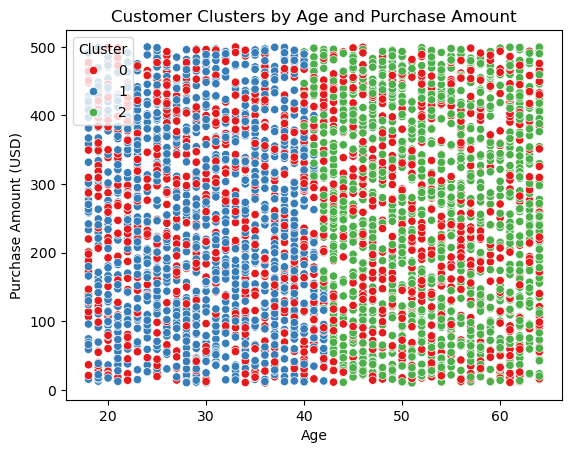

In [35]:
### Age vs PurchaseAmountUSD colored by cluster
sns.scatterplot(
    data=df,
    x='Age',
    y='PurchaseAmountUSD',
    hue='Cluster',
    palette='Set1'
)

plt.title("Customer Clusters by Age and Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

In [36]:
### Interpret Each Cluster
df.groupby('Cluster')[['Age','PurchaseAmountUSD','FrequencyOfPurchases','PreviousPurchases']].mean()

Age  PurchaseAmountUSD  FrequencyOfPurchases  PreviousPurchases
Cluster                                                                       
0        40.778287         258.207355              4.000000           6.944954
1        29.664075         246.774751              1.480560           6.828149
2        52.977795         261.325613              1.501531           7.032925

In [37]:
### Identify Dominant Factors Per Cluster
df.groupby('Cluster')['Category'].value_counts().head(10)

Cluster  Category   
0        Accessories    280
         Clothing       277
         Electronics    272
         Home Decor     244
         Sports         235
1        Electronics    261
         Home Decor     261
         Sports         260
         Accessories    258
         Clothing       246
Name: count, dtype: int64

In [38]:
df.groupby('Cluster')['PaymentMethod'].value_counts()

Cluster  PaymentMethod
0        Credit Card      287
         UPI              269
         PayPal           267
         Debit Card       244
         Cash             241
1        Debit Card       278
         UPI              272
         Credit Card      259
         PayPal           245
         Cash             232
2        PayPal           279
         Cash             270
         Credit Card      256
         UPI              251
         Debit Card       250
Name: count, dtype: int64

In [39]:
df.groupby('Cluster')['SubscriptionStatus'].value_counts()

Cluster  SubscriptionStatus
0        No                    660
         Yes                   648
1        No                    663
         Yes                   623
2        Yes                   660
         No                    646
Name: count, dtype: int64

In [40]:
### Understand Each Cluster Clearly
cluster_profile = df.groupby('Cluster')[[
    'Age',
    'PurchaseAmountUSD',
    'FrequencyOfPurchases',
    'PreviousPurchases'
]].mean()

print(cluster_profile)

               Age  PurchaseAmountUSD  FrequencyOfPurchases  PreviousPurchases
Cluster                                                                       
0        40.778287         258.207355              4.000000           6.944954
1        29.664075         246.774751              1.480560           6.828149
2        52.977795         261.325613              1.501531           7.032925


In [41]:
### Map Cluster into names
# Define cluster names
cluster_names = {
    0: 'High-Value Loyal Customers',
    1: 'Price-Sensitive Occasional Buyers',
    2: 'Seasonal & Moderate Shoppers'
}

In [42]:
# Add cluster names to dataframe
df['ClusterName'] = df['Cluster'].map(cluster_names)

In [43]:
# Verify
df[['CustomerID', 'Cluster', 'ClusterName']].head()

CustomerID  Cluster                        ClusterName
0           1        2       Seasonal & Moderate Shoppers
1           2        0         High-Value Loyal Customers
2           3        1  Price-Sensitive Occasional Buyers
3           4        0         High-Value Loyal Customers
4           5        1  Price-Sensitive Occasional Buyers

In [44]:
### Show Cluster Distribution
df['ClusterName'].value_counts()

ClusterName
High-Value Loyal Customers           1308
Seasonal & Moderate Shoppers         1306
Price-Sensitive Occasional Buyers    1286
Name: count, dtype: int64

In [45]:
### Show Cluster Profiles
df.groupby('ClusterName')[[
    'Age',
    'PurchaseAmountUSD',
    'FrequencyOfPurchases',
    'PreviousPurchases'
]].mean()

Age  PurchaseAmountUSD  \
ClusterName                                                       
High-Value Loyal Customers         40.778287         258.207355   
Price-Sensitive Occasional Buyers  29.664075         246.774751   
Seasonal & Moderate Shoppers       52.977795         261.325613   

                                   FrequencyOfPurchases  PreviousPurchases  
ClusterName                                                                 
High-Value Loyal Customers                     4.000000           6.944954  
Price-Sensitive Occasional Buyers              1.480560           6.828149  
Seasonal & Moderate Shoppers                   1.501531           7.032925

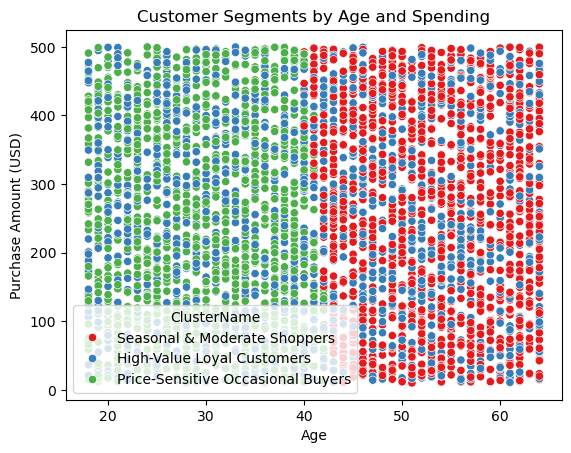

In [46]:
### Visualize Cluster with names
sns.scatterplot(
    data=df,
    x='Age',
    y='PurchaseAmountUSD',
    hue='ClusterName',
    palette='Set1'
)

plt.title("Customer Segments by Age and Spending")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

In [47]:
### Average Purchase Value By Cluster
df.groupby('ClusterName')['PurchaseAmountUSD'].mean()

ClusterName
High-Value Loyal Customers           258.207355
Price-Sensitive Occasional Buyers    246.774751
Seasonal & Moderate Shoppers         261.325613
Name: PurchaseAmountUSD, dtype: float64

In [48]:
### Purchase Frequency by Cluster
df.groupby('ClusterName')['FrequencyOfPurchases'].mean()

ClusterName
High-Value Loyal Customers           4.000000
Price-Sensitive Occasional Buyers    1.480560
Seasonal & Moderate Shoppers         1.501531
Name: FrequencyOfPurchases, dtype: float64

In [49]:
### Cluster Value
### CLV = Avg Purchase Amount × Purchase Frequency × Previous Purchases
df['CLV_Proxy'] = (
    df['PurchaseAmountUSD'] *
    df['FrequencyOfPurchases'] *
    df['PreviousPurchases']
)

df.groupby('ClusterName')['CLV_Proxy'].mean()

ClusterName
High-Value Loyal Customers           7155.224434
Price-Sensitive Occasional Buyers    2505.658002
Seasonal & Moderate Shoppers         2768.268645
Name: CLV_Proxy, dtype: float64

In [50]:
### Discount Dependency By Cluster
df.groupby('ClusterName')['DiscountApplied'].value_counts(normalize=True)

ClusterName                        DiscountApplied
High-Value Loyal Customers         No                 0.533639
                                   Yes                0.466361
Price-Sensitive Occasional Buyers  Yes                0.510886
                                   No                 0.489114
Seasonal & Moderate Shoppers       No                 0.517611
                                   Yes                0.482389
Name: proportion, dtype: float64

In [52]:
### Subscription Adoption By Cluster
df.groupby('ClusterName')['SubscriptionStatus'].value_counts(normalize=True)

ClusterName                        SubscriptionStatus
High-Value Loyal Customers         No                    0.504587
                                   Yes                   0.495413
Price-Sensitive Occasional Buyers  No                    0.515552
                                   Yes                   0.484448
Seasonal & Moderate Shoppers       Yes                   0.505360
                                   No                    0.494640
Name: proportion, dtype: float64

In [53]:
### KPI Summary Table
kpi_summary = df.groupby('ClusterName').agg(
    Avg_Purchase_Amount=('PurchaseAmountUSD', 'mean'),
    Avg_Frequency=('FrequencyOfPurchases', 'mean'),
    Avg_Previous_Purchases=('PreviousPurchases', 'mean'),
    Avg_CLV=('CLV_Proxy', 'mean')
)

kpi_summary

Avg_Purchase_Amount  Avg_Frequency  \
ClusterName                                                             
High-Value Loyal Customers                  258.207355       4.000000   
Price-Sensitive Occasional Buyers           246.774751       1.480560   
Seasonal & Moderate Shoppers                261.325613       1.501531   

                                   Avg_Previous_Purchases      Avg_CLV  
ClusterName                                                             
High-Value Loyal Customers                       6.944954  7155.224434  
Price-Sensitive Occasional Buyers                6.828149  2505.658002  
Seasonal & Moderate Shoppers                     7.032925  2768.268645

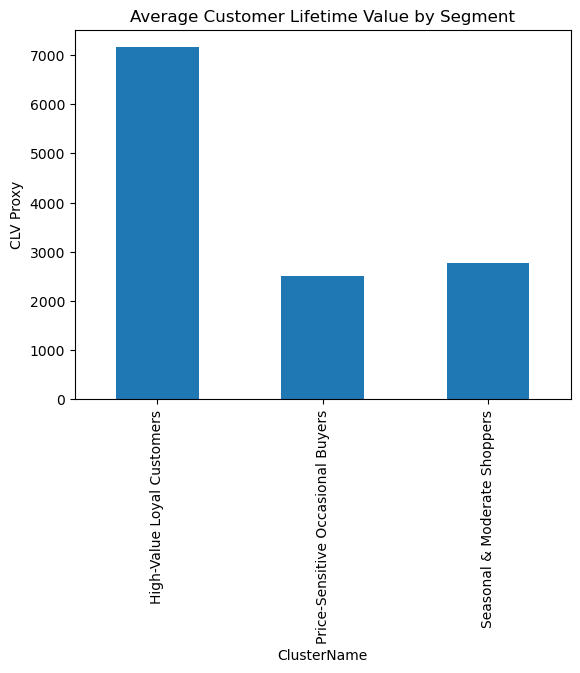

In [119]:
### KPI Visualization
kpi_summary['Avg_CLV'].plot(kind='bar')
plt.title("Average Customer Lifetime Value by Segment")
plt.ylabel("CLV Proxy")
plt.show()

### Identify the product categories where discounts should be applied

In [120]:
df[['Category', 'PurchaseAmountUSD', 'DiscountApplied', 'PreviousPurchases']].head()

Category  PurchaseAmountUSD DiscountApplied  PreviousPurchases
0  Accessories             374.86             Yes                  7
1   Home Decor              33.28             Yes                  3
2   Home Decor             117.45             Yes                 13
3   Home Decor             356.05              No                 14
4  Accessories             393.50              No                  5

In [122]:
### Category-wise Sales & Behavior Metrics
category_analysis = (
    df
    .groupby('Category')
    .agg(
        total_sales=('PurchaseAmountUSD', 'sum'),
        avg_order_value=('PurchaseAmountUSD', 'mean'),
        transaction_count=('PurchaseAmountUSD', 'count'),
        avg_previous_purchases=('PreviousPurchases', 'mean'),
        discount_usage_rate=('DiscountApplied', lambda x: (x == 'Yes').mean())
    )
    .reset_index()
)

category_analysis

Category  total_sales  avg_order_value  transaction_count  \
0  Accessories    208063.00       253.735366                820   
1     Clothing    208775.03       262.280188                796   
2  Electronics    193682.52       250.884093                772   
3   Home Decor    196999.83       259.210303                760   
4       Sports    188858.42       251.141516                752   

   avg_previous_purchases  discount_usage_rate  
0                6.892683             0.507317  
1                7.087940             0.474874  
2                6.808290             0.468912  
3                7.040789             0.498684  
4                6.847074             0.481383

In [123]:
### Normalize Metrics for Fair Comparison
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

category_analysis[['sales_norm', 'aov_norm', 'volume_norm', 'discount_norm']] = scaler.fit_transform(
    category_analysis[['total_sales', 'avg_order_value', 'transaction_count', 'discount_usage_rate']]
)

category_analysis

Category  total_sales  avg_order_value  transaction_count  \
0  Accessories    208063.00       253.735366                820   
1     Clothing    208775.03       262.280188                796   
2  Electronics    193682.52       250.884093                772   
3   Home Decor    196999.83       259.210303                760   
4       Sports    188858.42       251.141516                752   

   avg_previous_purchases  discount_usage_rate  sales_norm  aov_norm  \
0                6.892683             0.507317    0.964249  0.250197   
1                7.087940             0.474874    1.000000  1.000000   
2                6.808290             0.468912    0.242215  0.000000   
3                7.040789             0.498684    0.408775  0.730620   
4                6.847074             0.481383    0.000000  0.022589   

   volume_norm  discount_norm  
0     1.000000       1.000000  
1     0.647059       0.155251  
2     0.294118       0.000000  
3     0.117647       0.775216  
4     0.000000       0.324724

In [124]:
### Discount Priority Score
category_analysis['discount_priority_score'] = (
    (1 - category_analysis['aov_norm']) * 0.4 +
    category_analysis['volume_norm'] * 0.3 +
    category_analysis['discount_norm'] * 0.3
)

category_analysis.sort_values('discount_priority_score', ascending=False)

Category  total_sales  avg_order_value  transaction_count  \
0  Accessories    208063.00       253.735366                820   
4       Sports    188858.42       251.141516                752   
2  Electronics    193682.52       250.884093                772   
3   Home Decor    196999.83       259.210303                760   
1     Clothing    208775.03       262.280188                796   

   avg_previous_purchases  discount_usage_rate  sales_norm  aov_norm  \
0                6.892683             0.507317    0.964249  0.250197   
4                6.847074             0.481383    0.000000  0.022589   
2                6.808290             0.468912    0.242215  0.000000   
3                7.040789             0.498684    0.408775  0.730620   
1                7.087940             0.474874    1.000000  1.000000   

   volume_norm  discount_norm  discount_priority_score  
0     1.000000       1.000000                 0.899921  
4     0.000000       0.324724                 0.488382  
2     0.294118       0.000000                 0.488235  
3     0.117647       0.775216                 0.375611  
1     0.647059       0.155251                 0.240693

In [125]:
### Top Categories for Discounts
discount_categories = category_analysis.sort_values(
    'discount_priority_score', ascending=False
).head(3)

discount_categories

Category  total_sales  avg_order_value  transaction_count  \
0  Accessories    208063.00       253.735366                820   
4       Sports    188858.42       251.141516                752   
2  Electronics    193682.52       250.884093                772   

   avg_previous_purchases  discount_usage_rate  sales_norm  aov_norm  \
0                6.892683             0.507317    0.964249  0.250197   
4                6.847074             0.481383    0.000000  0.022589   
2                6.808290             0.468912    0.242215  0.000000   

   volume_norm  discount_norm  discount_priority_score  
0     1.000000       1.000000                 0.899921  
4     0.000000       0.324724                 0.488382  
2     0.294118       0.000000                 0.488235

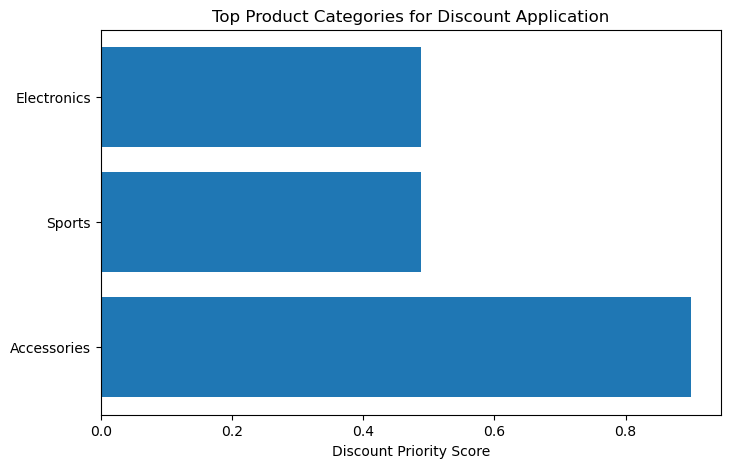

In [126]:
### Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    discount_categories['Category'],
    discount_categories['discount_priority_score']
)
plt.title('Top Product Categories for Discount Application')
plt.xlabel('Discount Priority Score')
plt.show()

### Key Insights
Product categories with high purchase volume, lower average order value, and strong historical discount usage are the best candidates for targeted discounts.Applying discounts in these categories can drive higher sales volume, increase customer retention, and optimize inventory movement.

### Identify card spending based on age and explore the impact of seasons and locations

In [92]:
### Filter Card Payments Only
card_df = df[df['PaymentMethod'] == 'Card']
card_df.head()

Empty DataFrame
Columns: [CustomerID, Age, Gender, ItemPurchased, Category, PurchaseAmountUSD, Location, Size, Color, Season, ReviewRating, SubscriptionStatus, ShippingType, DiscountApplied, PromoCodeUsed, PreviousPurchases, PaymentMethod, FrequencyOfPurchases, Cluster]
Index: []

In [99]:
df['PaymentMethod'].value_counts()

PaymentMethod
Credit Card    802
UPI            792
PayPal         791
Debit Card     772
Cash           743
Name: count, dtype: int64

In [100]:
card_df = df[df['PaymentMethod'].str.contains('card', case=False, na=False)]

In [101]:
card_df.shape

(1574, 19)

In [ ]:
### Create Age Groups
bins = [0, 18, 25, 35, 45, 55, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '55+']

card_df['Age Group'] = pd.cut(
    card_df['Age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [103]:
card_df.columns

Index(['CustomerID', 'Age', 'Gender', 'ItemPurchased', 'Category',
       'PurchaseAmountUSD', 'Location', 'Size', 'Color', 'Season',
       'ReviewRating', 'SubscriptionStatus', 'ShippingType', 'DiscountApplied',
       'PromoCodeUsed', 'PreviousPurchases', 'PaymentMethod',
       'FrequencyOfPurchases', 'Cluster'],
      dtype='object')

In [107]:
### Create Card
card_df = df[df['PaymentMethod'].str.contains('card', case=False, na=False)].copy()

In [108]:
### Create Age Group
card_df['Age Group'] = pd.cut(
    card_df['Age'],
    bins=[0, 18, 25, 35, 45, 55, 100],
    labels=['<18', '18-25', '26-35', '36-45', '46-55', '55+'],
    include_lowest=True
)

In [110]:
### Card Spending by Age Group
age_spending = (
    card_df
    .groupby('Age Group', observed=True)['PurchaseAmountUSD']
    .sum()
    .reset_index()
)

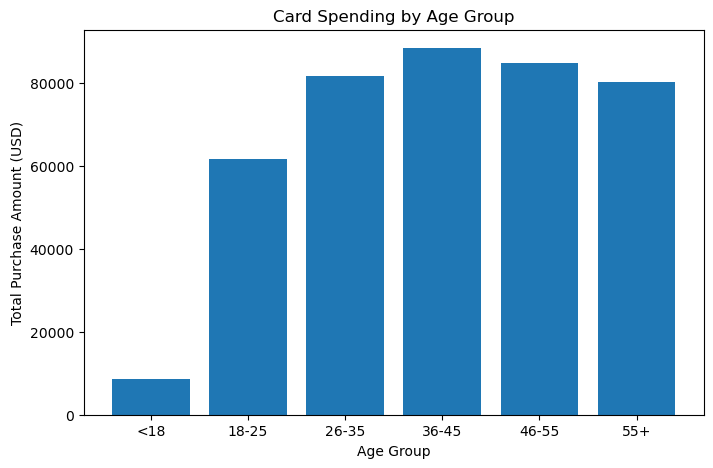

In [111]:
### Card Spending by Age Group
plt.figure(figsize=(8,5))
plt.bar(age_spending['Age Group'], age_spending['PurchaseAmountUSD'])
plt.title('Card Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

In [112]:
### Impact of Seasons on Card Spending
season_spending = card_df.groupby('Season')['PurchaseAmountUSD'].sum().reset_index()
season_spending

Season  PurchaseAmountUSD
0    Fall           99418.85
1  Spring          105748.28
2  Summer           96988.84
3  Winter          103650.98

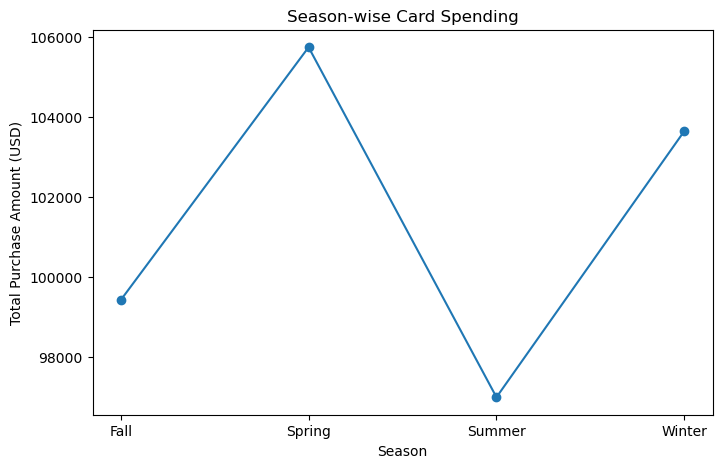

In [113]:
### Seasonal Card Spending
plt.figure(figsize=(8,5))
plt.plot(season_spending['Season'], season_spending['PurchaseAmountUSD'], marker='o')
plt.title('Season-wise Card Spending')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

In [114]:
### Impact of Location on Card Spending
location_spending = card_df.groupby('Location')['PurchaseAmountUSD'].sum().reset_index()
location_spending

Location  PurchaseAmountUSD
0      Chicago           81730.80
1      Houston           78587.57
2  Los Angeles           83297.97
3        Miami           71488.05
4     New York           90702.56

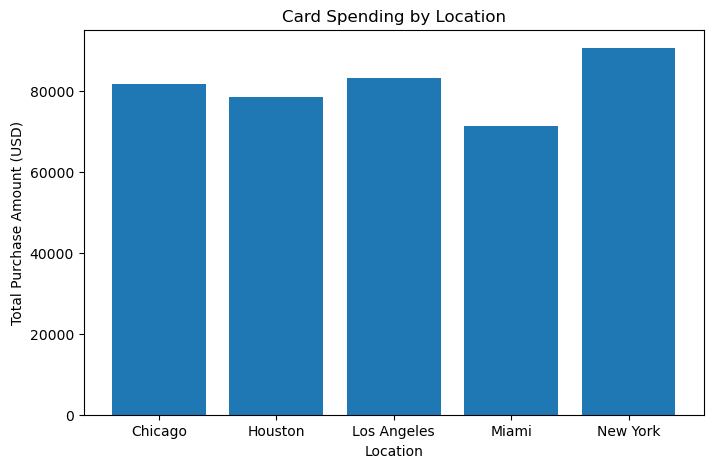

In [115]:
### Location-wise Card Spending
plt.figure(figsize=(8,5))
plt.bar(location_spending['Location'], location_spending['PurchaseAmountUSD'])
plt.title('Card Spending by Location')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

In [118]:
### Combined Analysis: Age × Season × Location
combined = (
    card_df
    .groupby(['Age Group', 'Season', 'Location'], observed=True)['PurchaseAmountUSD']
    .sum()
    .reset_index()
)

### Key Insights
Highest card spending observed in age group 26–35  
• Winter season drives maximum card transactions  
• Urban locations contribute the highest card-based revenue  
• Combination of Urban + Winter + Age 26–45 generates peak sales